In [9]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
# Fetching the Data and Cleaning
df_survey = pd.read_csv('Data_Science_Topics_Survey.csv')
ques1="What's your level of interest for the following areas of Data Science? [Data Visualization]"
ques2="What's your level of interest for the following areas of Data Science? [Machine Learning]"
ques3="What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]"
ques4="What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]"
ques5="What's your level of interest for the following areas of Data Science? [Data Journalism]"
ques6="What's your level of interest for the following areas of Data Science? [Deep Learning]"
cols = {ques1:'Data Visualization',ques2:'Machine Learning',ques3:'Data Analysis / Statistics',ques4:'Big Data (Spark / Hadoop)',ques5:'Data Journalism',ques6:'Deep Learning'}
df_survey.rename(columns=cols,inplace=True)
df_survey.drop(['Timestamp'],axis=1,inplace=True)
cols=['Data Analysis / Statistics','Machine Learning','Data Visualization','Deep Learning','Big Data (Spark / Hadoop)','Data Journalism']
df_survey = df_survey.reindex(columns=cols)

In [11]:
# Value obtained for Not Interested, Somewhat Interested and Very Interested
NotInterested = (df_survey[cols]=='Not interested').sum()
SomewhatInterested = (df_survey[cols]=='Somewhat interested').sum()
VeryInterested = (df_survey[cols]=='Very interested').sum()
dict = {'':cols,'Very Interested':VeryInterested.values,'Somewhat Interested':SomewhatInterested.values,'Not Interested':NotInterested.values}

In [12]:
# Cleaning done and new DataFrame is formed
df = pd.DataFrame(dict)
df.set_index('',inplace=True)
# Values are converted into percentage
df['Very Interested']=df['Very Interested']/2233
df['Somewhat Interested']=df['Somewhat Interested']/2233
df['Not Interested']=df['Not Interested']/2233
df.style.format({
    'Very Interested': '{:.2%}'.format,
    'Somewhat Interested': '{:,.2%}'.format,
    'Not Interested': '{:,.2%}'.format,
})

,Very Interested,Somewhat Interested,Not Interested
,,,
Data Analysis / Statistics,75.59%,19.88%,2.69%
Machine Learning,72.95%,21.36%,3.31%
Data Visualization,60.01%,32.87%,4.57%
Deep Learning,56.56%,34.48%,6.09%
Big Data (Spark / Hadoop),59.65%,32.65%,5.69%
Data Journalism,19.21%,48.41%,27.32%


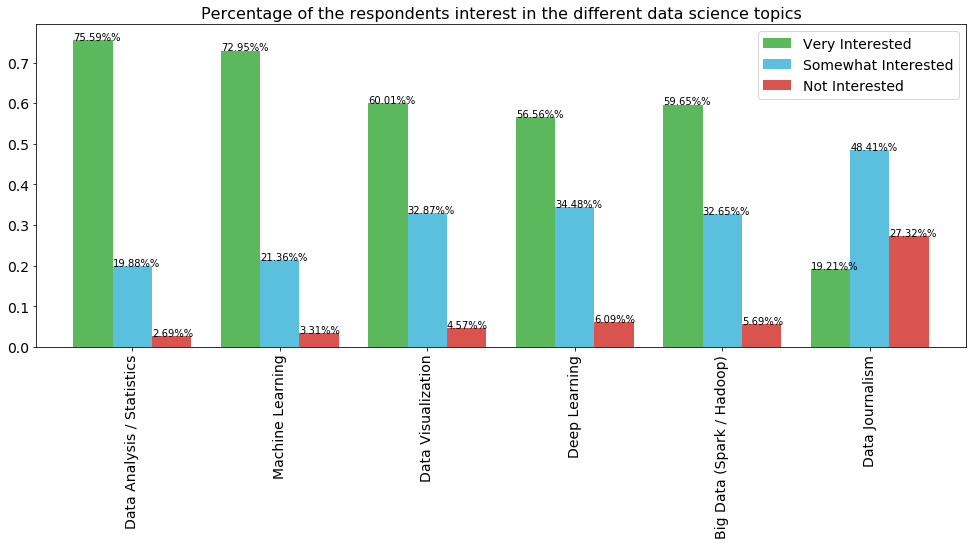

In [13]:
# fig instance is created
fig = Figure()
# canvas instance is created
canvas = FigureCanvas(fig)
colorlist=['#5cb85c','#5bc0de','#d9534f']
ax = df.plot(kind='bar',figsize=(13.66,7.68),width=0.8,color=colorlist,fontsize=14,linewidth=0)
ax.set_title('Percentage of the respondents interest in the different data science topics',fontsize=16)
ax.legend(labels=df.columns,fontsize=14,loc='upper right')
df.reset_index(inplace=True)

for p in ax.patches:
    height = "{0:.2f}%".format(p.get_height()*100)
    ax.annotate(str(height)+'%',xy=(p.get_x(),p.get_height()),color='black')
plt.tight_layout()
plt.savefig('part1.png')
plt.show()